In [1]:
import pandas as pd
import numpy as np

In [2]:
#Carga de datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### En redes neuronales los dataframes tienen que estandarizarse SIEMPRE

shape (dimension de la entrada)


In [3]:
X = data.iloc[:, :-1].values #Todas las columnas excepto 'Outcome'
y = data.iloc[:, -1].values #Solo la columna 'Outcome'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #en redes neuronales los dataframes tienen que estandarizarse SIEMPRE
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input



#Creamos el modelo de red neuronal
model = Sequential([
 Input(shape=(X_train.shape[1],)), # Definir forma de la entrada 1 porque son filas
 Dense(16, activation='relu'), # 1a capa oculta
 Dense(8, activation='relu'), # 2a capa oculta
 Dense(1, activation='sigmoid') #Salida (sigmoid porque es binaria)
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Mostramos configuración
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Lanzamos el entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6413 - loss: 0.7845 - val_accuracy: 0.6016 - val_loss: 0.7601
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6807 - loss: 0.6712 - val_accuracy: 0.6016 - val_loss: 0.7152
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6810 - loss: 0.6486 - val_accuracy: 0.6098 - val_loss: 0.6802
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7120 - loss: 0.6270 - val_accuracy: 0.6098 - val_loss: 0.6487
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7009 - loss: 0.6117 - val_accuracy: 0.6260 - val_loss: 0.6254
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6976 - loss: 0.6022 - val_accuracy: 0.6504 - val_loss: 0.6030
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7473 - loss: 0.5637 - val_accuracy: 0.6504 - val_loss: 0.5869
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7458 - loss: 0.5521 - val_accuracy: 0.6504 - val_loss

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida: {loss}, Precisión: {accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6930 - loss: 0.5991 
Pérdida: 0.6142725348472595, Precisión: 0.7142857313156128


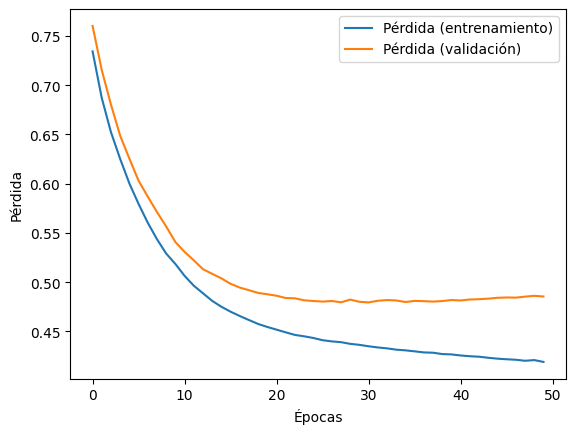

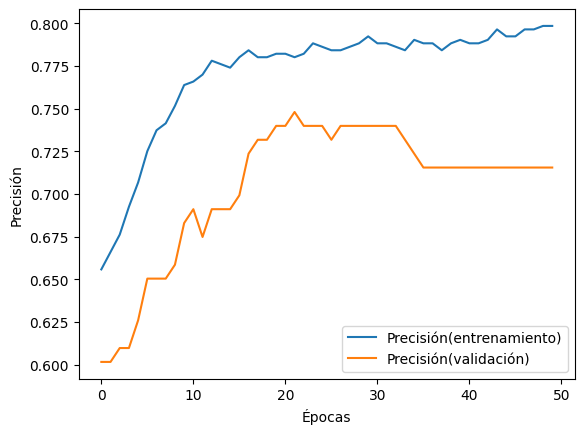

In [7]:
import matplotlib.pyplot as plt
#Pérdida
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
#Precisión
plt.plot(history.history['accuracy'], label='Precisión(entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión(validación)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()